In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df1 = pd.read_csv('Unemployment in India.csv')
df1.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df2 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
#exploratory data analysis

print(df1.info())
print(df1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None
        Estimated Unemployment Rate (%)   Estimated Employed  \
count                        740.000000         7.400000e+02   
mean                          11.787946         7.204460e+06   
std    

In [8]:
print(df2['Region'].isnull().sum())

Region    0
Region    0
dtype: int64


In [6]:
df2.columns = ['Region', 'Date', 'Frequency', 'UnemploymentRate', 'Employed',
              'LabourParticipation', 'Region', 'longitude', 'latitude']

df2.head()


,Region,Date,Frequency,UnemploymentRate,Employed,LabourParticipation,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


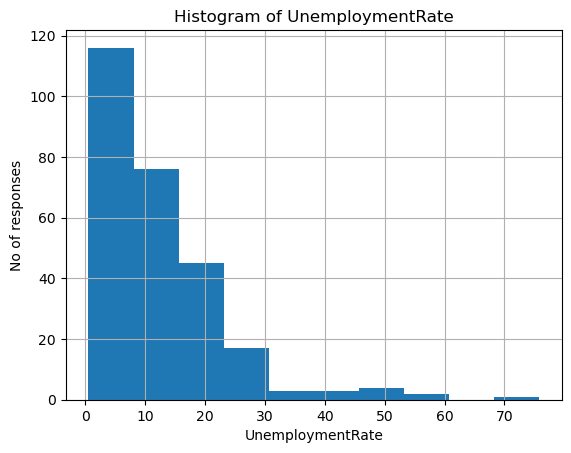

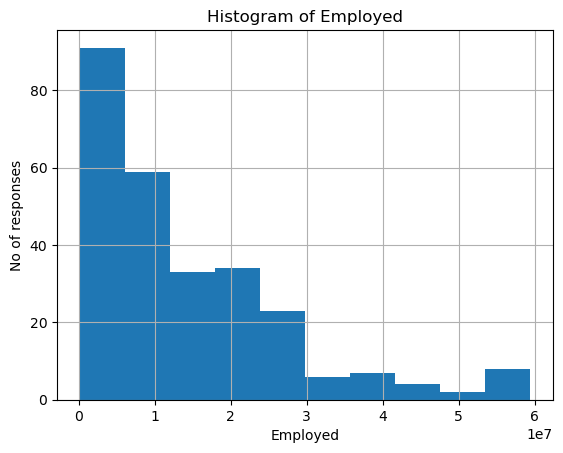

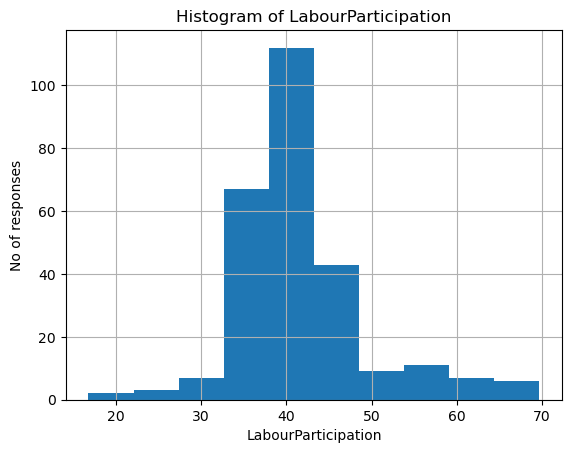

In [15]:
# Univariate Visualization
df2['UnemploymentRate'].hist()
plt.title('Histogram of UnemploymentRate')
plt.xlabel('UnemploymentRate')
plt.ylabel('No of responses')
plt.show()

df2['Employed	'].hist()
plt.title('Histogram of Employed')
plt.xlabel('Employed')
plt.ylabel('No of responses')
plt.show()

df2['LabourParticipation'].hist()
plt.title('Histogram of LabourParticipation')
plt.xlabel('LabourParticipation')
plt.ylabel('No of responses')
plt.show()

C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


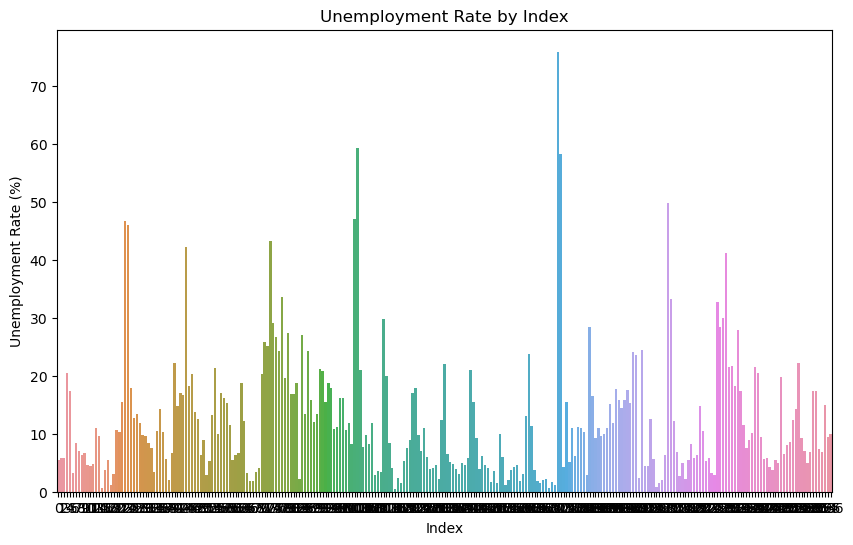

In [17]:
# Bar Chart for UnemploymentRate
plt.figure(figsize=(10, 6))
sns.barplot(x=df2.index, y='UnemploymentRate', data=df2)
plt.title('Unemployment Rate by Index')
plt.xlabel('Index')
plt.ylabel('Unemployment Rate (%)')
plt.show()

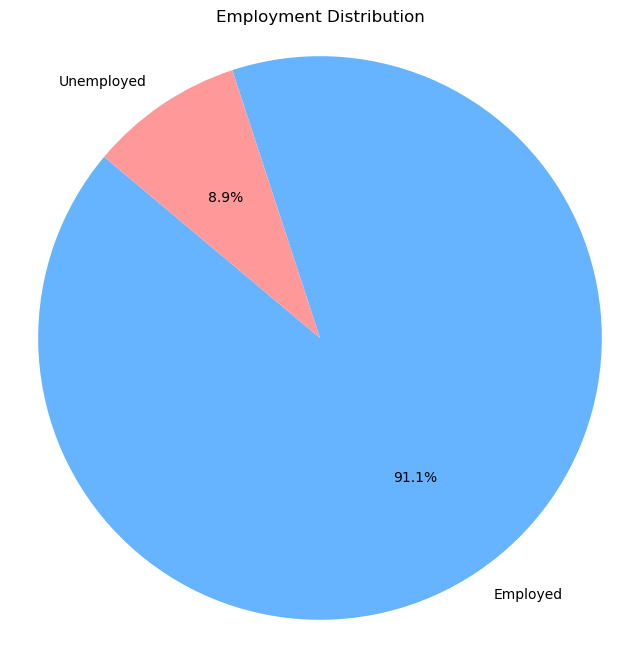

In [18]:
# Pie Chart for Employment Distribution
employed_sum = df2['Employed'].sum()
unemployed_sum = (df2['UnemploymentRate'] * df2['Employed']).sum() / 100

# Data for pie chart
labels = ['Employed', 'Unemployed']
sizes = [employed_sum, unemployed_sum]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Employment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

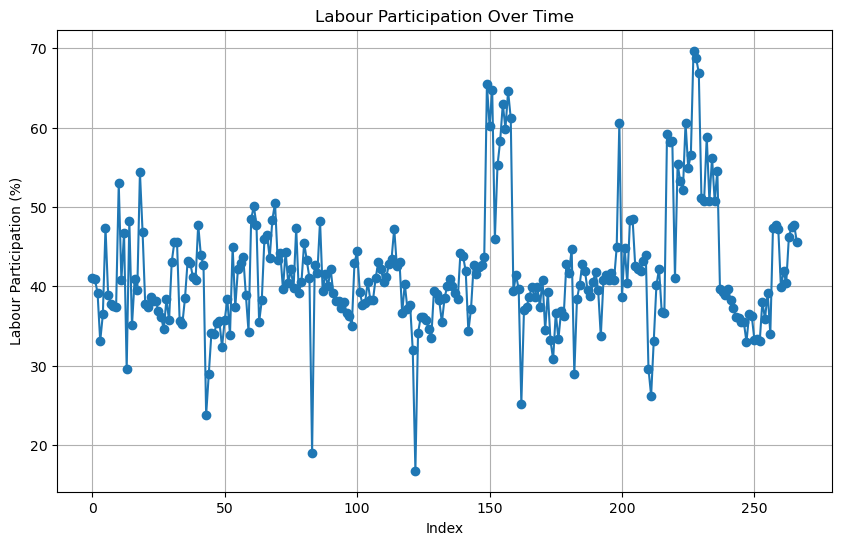

In [19]:
# Line Chart for LabourParticipation
plt.figure(figsize=(10, 6))
plt.plot(df2.index, df2['LabourParticipation'], marker='o', linestyle='-')
plt.title('Labour Participation Over Time')
plt.xlabel('Index')
plt.ylabel('Labour Participation (%)')
plt.grid(True)
plt.show()

C:\Users\Vedha\AppData\Local\Temp\ipykernel_25048\1624750507.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['Date'] = pd.to_datetime(df2['Date'])


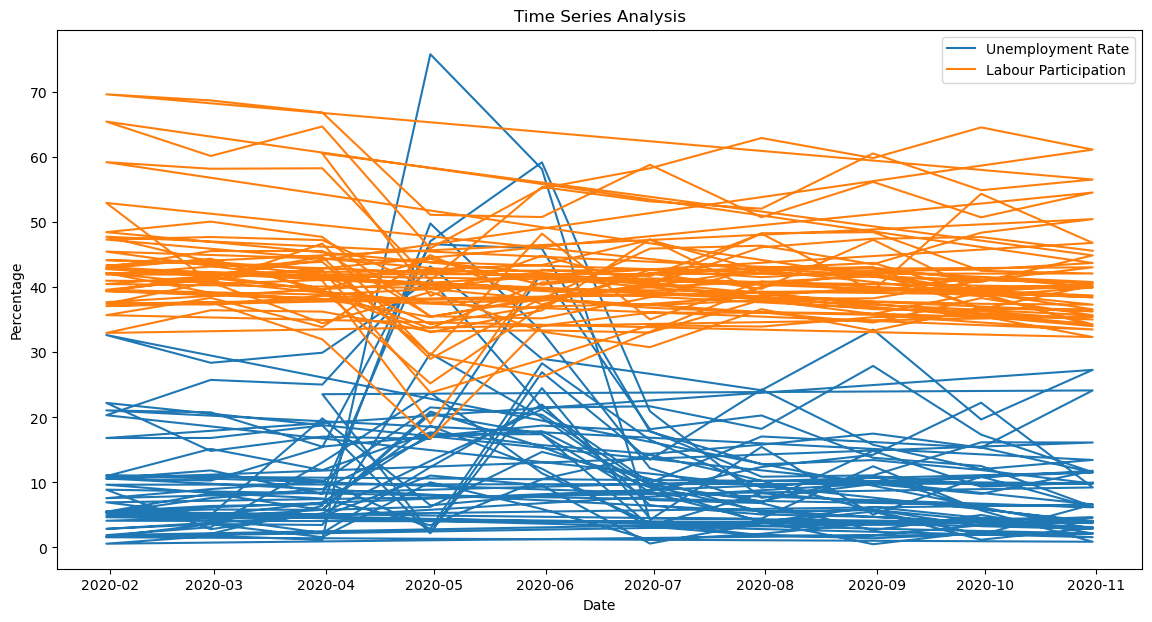

In [22]:
# Time Series Analysis
df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date', inplace=True)
plt.figure(figsize=(14, 7))
plt.plot(df2.index, df2['UnemploymentRate'], label='Unemployment Rate')
plt.plot(df2.index, df2['LabourParticipation'], label='Labour Participation')
plt.title('Time Series Analysis')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.show()

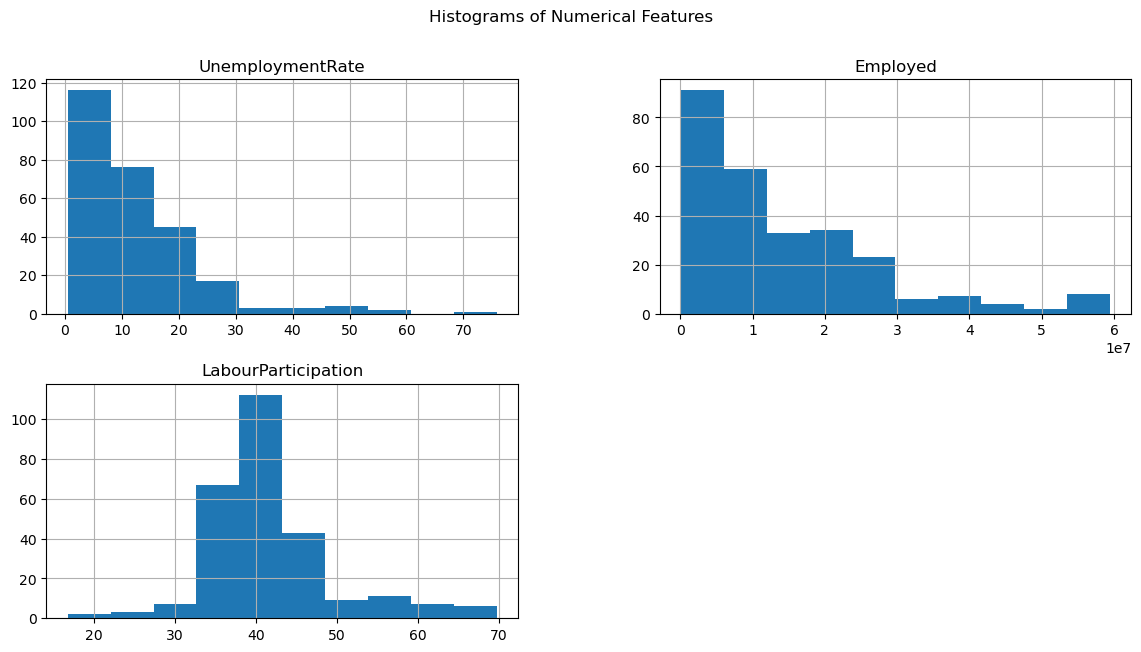

In [9]:
# Histogram
df2[['UnemploymentRate', 'Employed', 'LabourParticipation']].hist(figsize=(14, 7))
plt.suptitle('Histograms of Numerical Features')
plt.show()

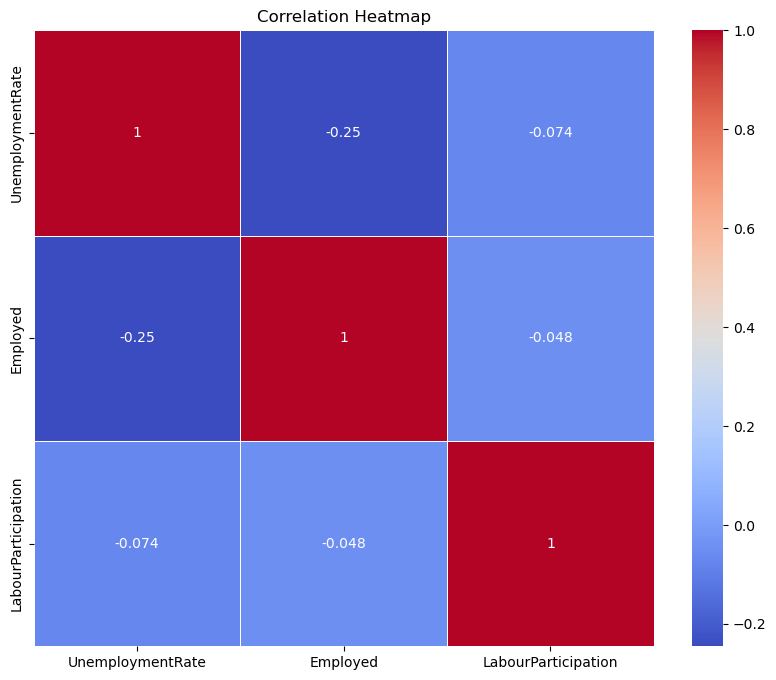

In [11]:
# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df2[['UnemploymentRate', 'Employed', 'LabourParticipation']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

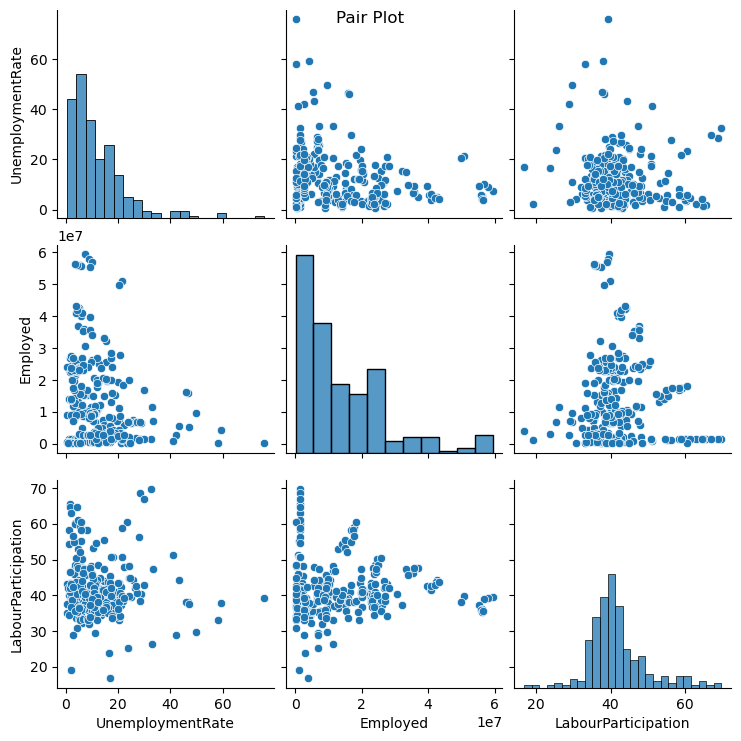

In [12]:
# Pair Plot
sns.pairplot(df2[['UnemploymentRate', 'Employed', 'LabourParticipation']])
plt.suptitle('Pair Plot')
plt.show()

C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


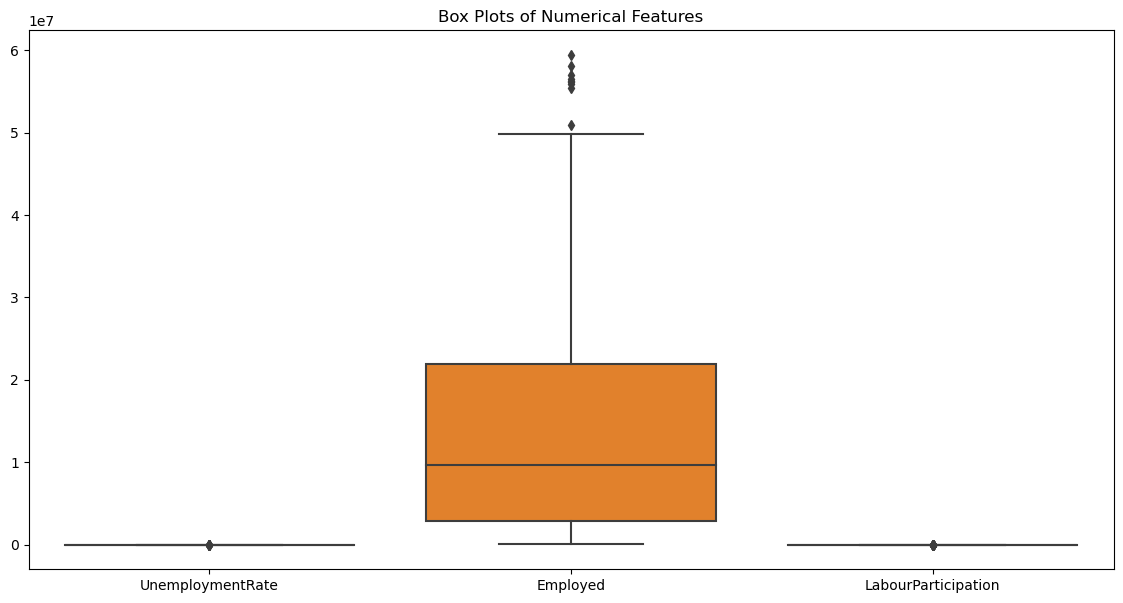

In [13]:
# Box Plot
plt.figure(figsize=(14, 7))
sns.boxplot(data=df2[['UnemploymentRate', 'Employed', 'LabourParticipation']])
plt.title('Box Plots of Numerical Features')
plt.show()

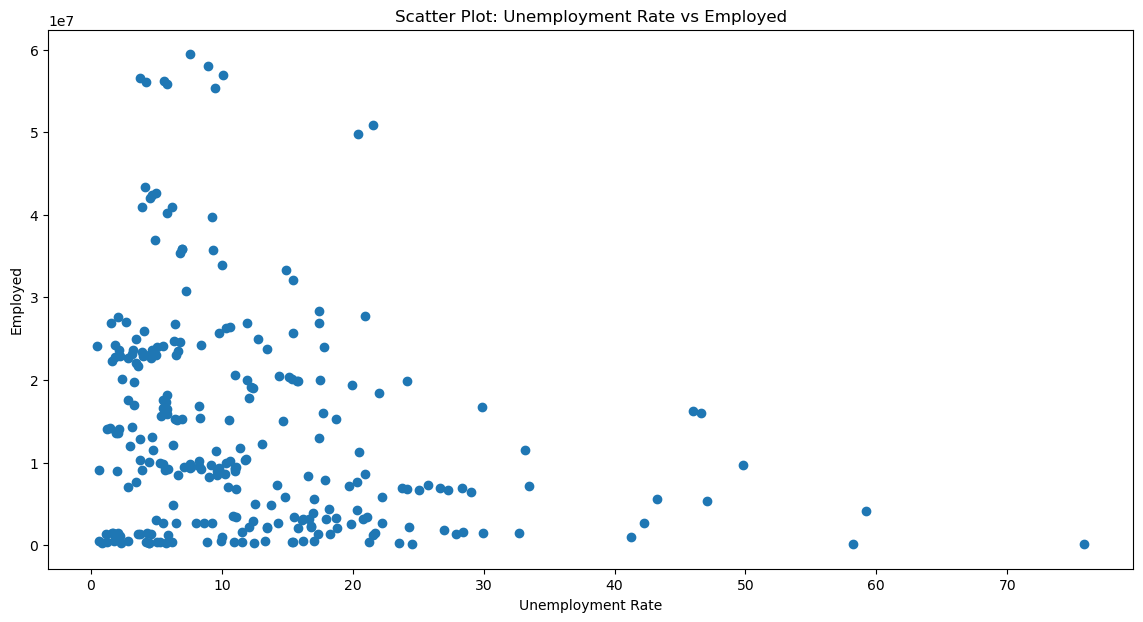

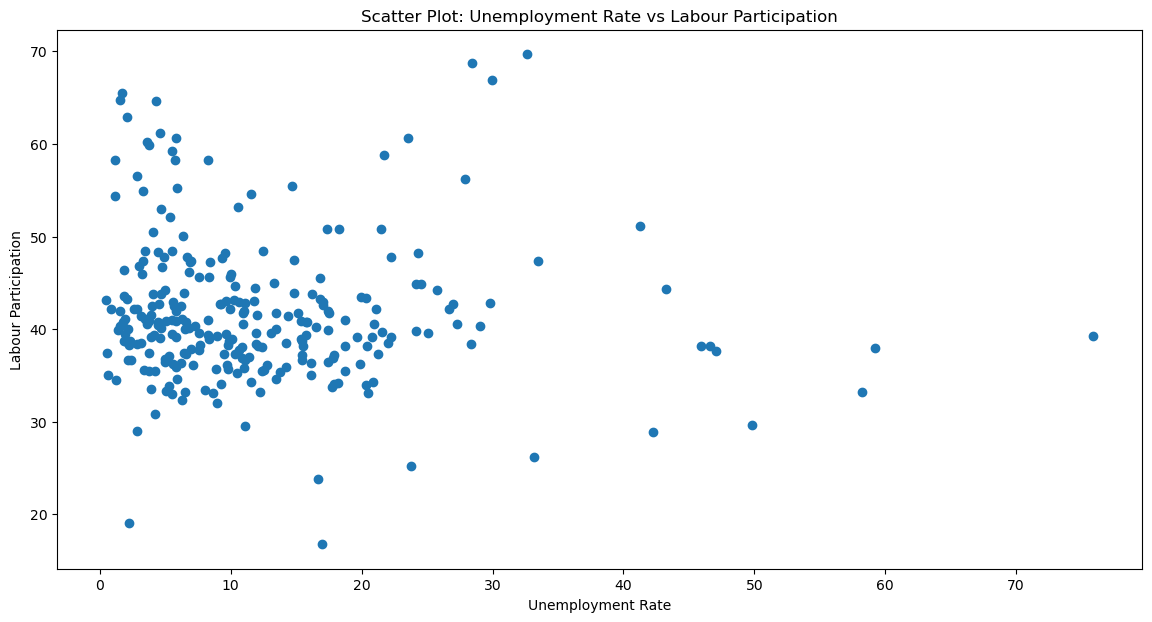

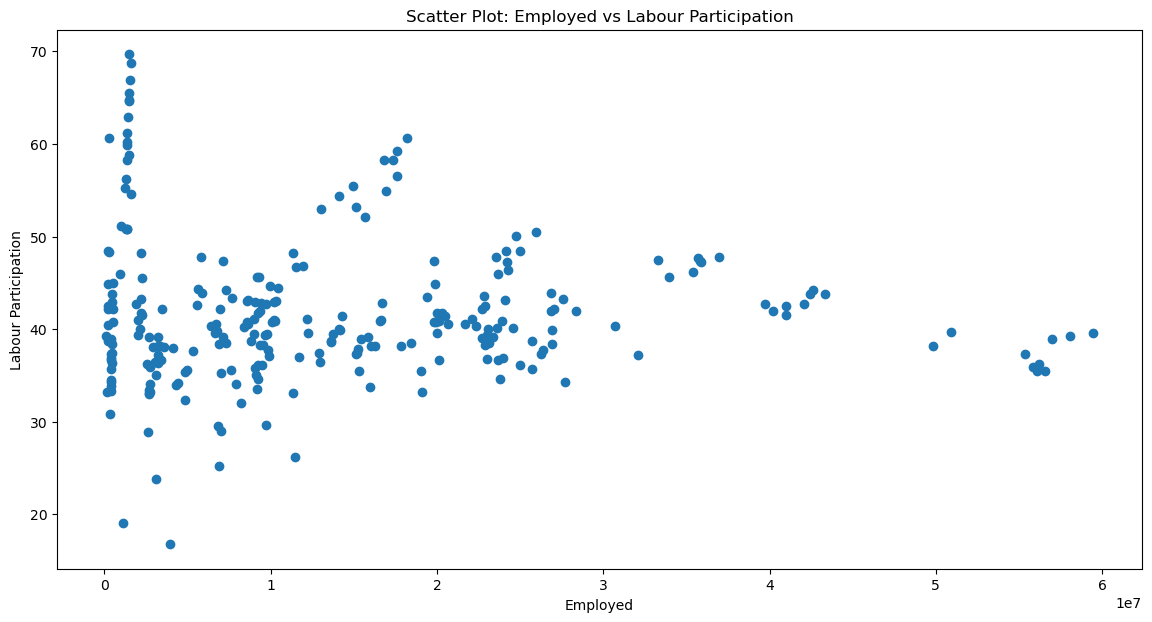

In [14]:
# Scatter Plots
plt.figure(figsize=(14, 7))
plt.scatter(df2['UnemploymentRate'], df2['Employed'])
plt.title('Scatter Plot: Unemployment Rate vs Employed')
plt.xlabel('Unemployment Rate')
plt.ylabel('Employed')
plt.show()

plt.figure(figsize=(14, 7))
plt.scatter(df2['UnemploymentRate'], df2['LabourParticipation'])
plt.title('Scatter Plot: Unemployment Rate vs Labour Participation')
plt.xlabel('Unemployment Rate')
plt.ylabel('Labour Participation')
plt.show()

plt.figure(figsize=(14, 7))
plt.scatter(df2['Employed'], df2['LabourParticipation'])
plt.title('Scatter Plot: Employed vs Labour Participation')
plt.xlabel('Employed')
plt.ylabel('Labour Participation')
plt.show()

C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


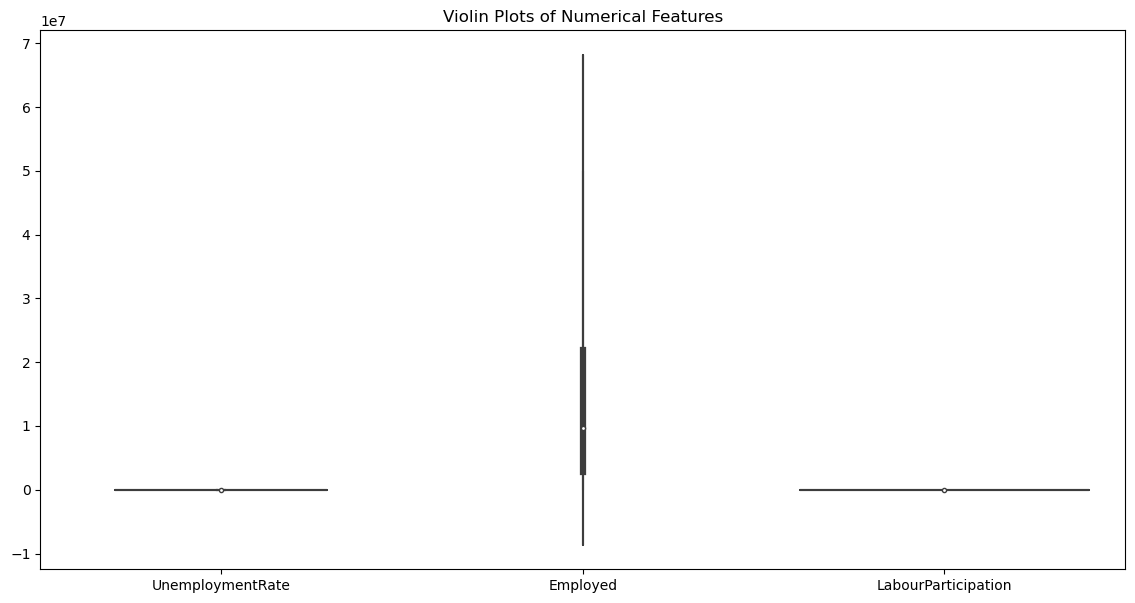

In [15]:
# Violin Plot
plt.figure(figsize=(14, 7))
sns.violinplot(data=df2[['UnemploymentRate', 'Employed', 'LabourParticipation']])
plt.title('Violin Plots of Numerical Features')
plt.show()

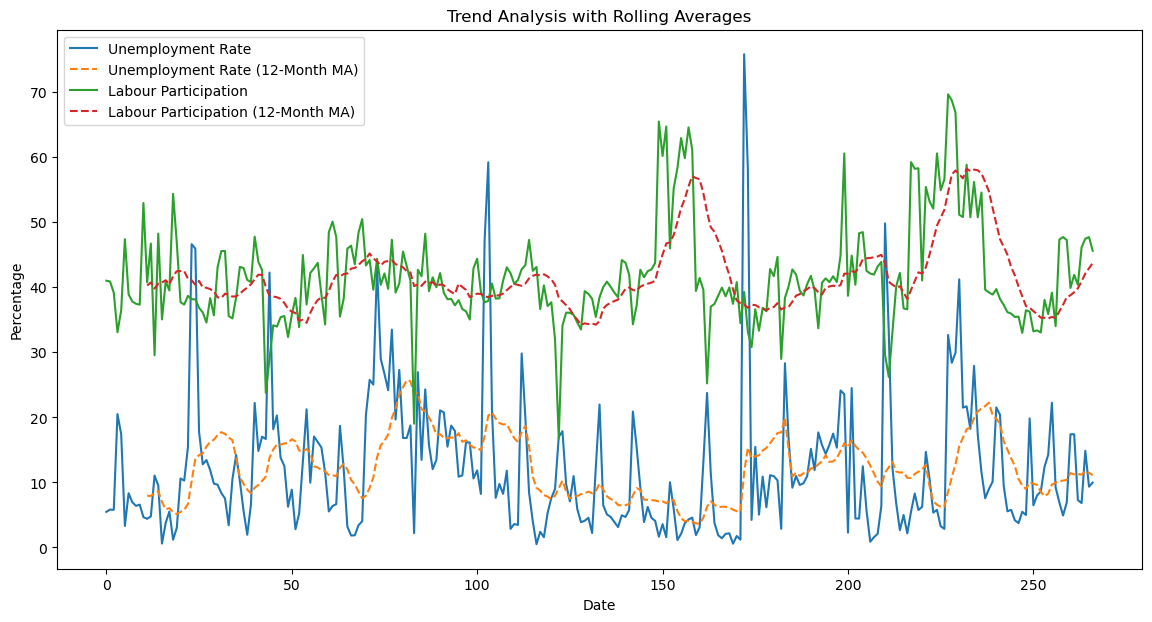

In [16]:
# Trend Analysis with Rolling Averages
df2['UnemploymentRate_MA'] = df2['UnemploymentRate'].rolling(window=12).mean()
df2['LabourParticipation_MA'] = df2['LabourParticipation'].rolling(window=12).mean()

plt.figure(figsize=(14, 7))
plt.plot(df2.index, df2['UnemploymentRate'], label='Unemployment Rate')
plt.plot(df2.index, df2['UnemploymentRate_MA'], label='Unemployment Rate (12-Month MA)', linestyle='--')
plt.plot(df2.index, df2['LabourParticipation'], label='Labour Participation')
plt.plot(df2.index, df2['LabourParticipation_MA'], label='Labour Participation (12-Month MA)', linestyle='--')
plt.title('Trend Analysis with Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.show()

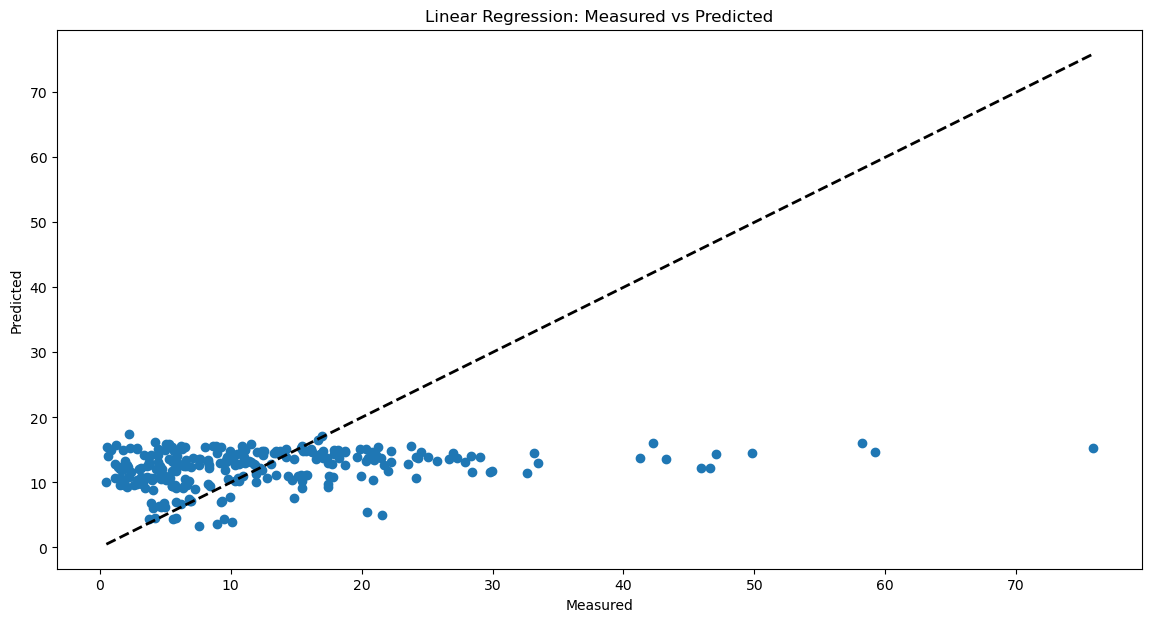

Coefficients: [-2.01475804e-07 -1.17724288e-01]
Intercept: 19.95688883578378


In [20]:
# Linear Regression
# Prepare the data
X = df2[['Employed', 'LabourParticipation']]
y = df2['UnemploymentRate']

# Initialize and fit the model
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

# Predict and plot
y_pred = linear_regressor.predict(X)

plt.figure(figsize=(14, 7))
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression: Measured vs Predicted')
plt.show()

# Print coefficients
print(f'Coefficients: {linear_regressor.coef_}')
print(f'Intercept: {linear_regressor.intercept_}')


C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

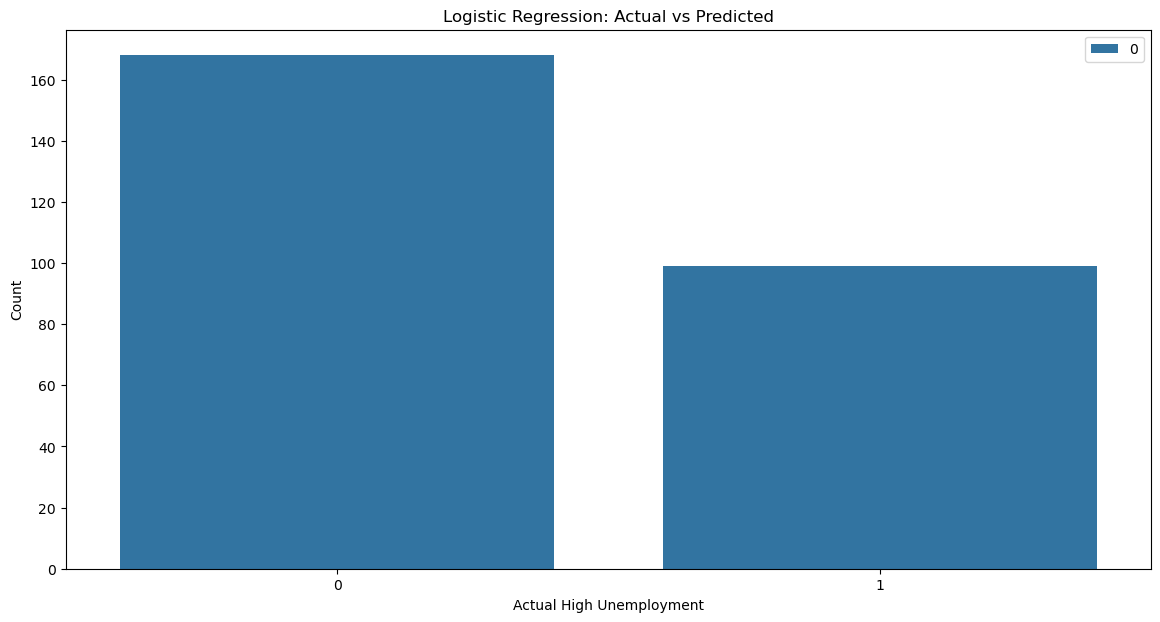

Coefficients: [[-4.56643884e-08 -6.16831949e-14]]
Intercept: [-8.07595338e-16]


In [21]:
# Logistic Regression
# Create a binary target variable
threshold = df2['UnemploymentRate'].mean()
df2['HighUnemployment'] = (df2['UnemploymentRate'] > threshold).astype(int)

# Prepare the data
X_log = df2[['Employed', 'LabourParticipation']]
y_log = df2['HighUnemployment']

# Initialize and fit the model
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_log, y_log)

# Predict and print the results
y_log_pred = logistic_regressor.predict(X_log)

plt.figure(figsize=(14, 7))
sns.countplot(x=y_log, hue=y_log_pred, data=df2)
plt.title('Logistic Regression: Actual vs Predicted')
plt.xlabel('Actual High Unemployment')
plt.ylabel('Count')
plt.show()

# Print coefficients
print(f'Coefficients: {logistic_regressor.coef_}')
print(f'Intercept: {logistic_regressor.intercept_}')

C:\Users\Vedha\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

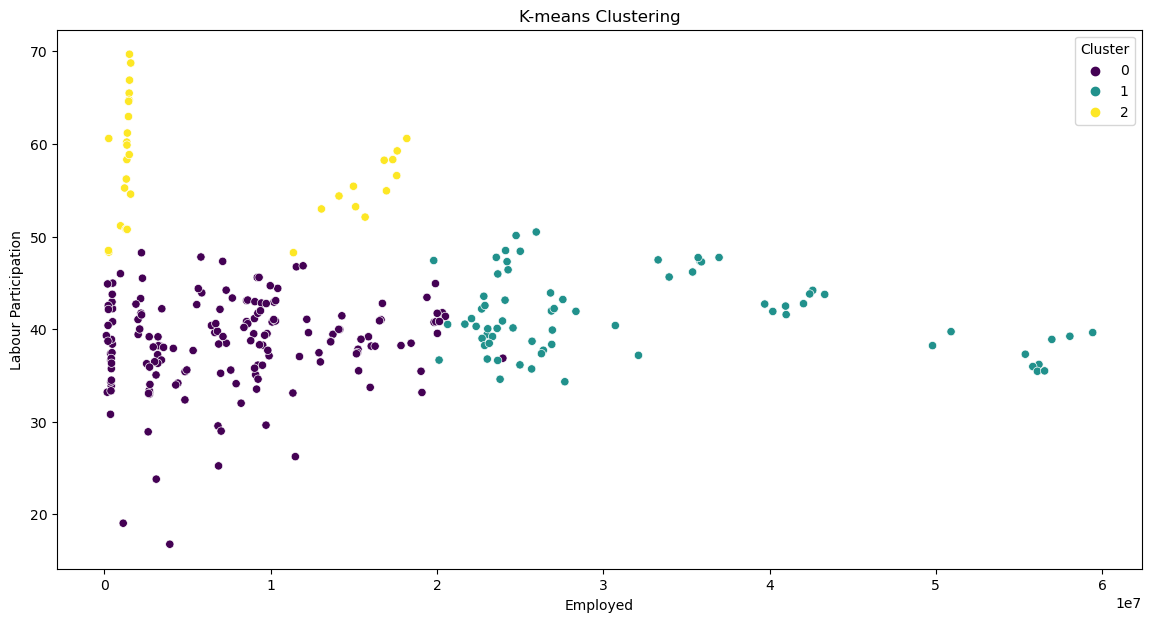

In [22]:
# Clustering
# Standardize the data
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2[['UnemploymentRate', 'Employed', 'LabourParticipation']])

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df2['Cluster'] = kmeans.fit_predict(df2_scaled)

# Plot the clusters
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Employed', y='LabourParticipation', hue='Cluster', data=df2, palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('Employed')
plt.ylabel('Labour Participation')
plt.show()

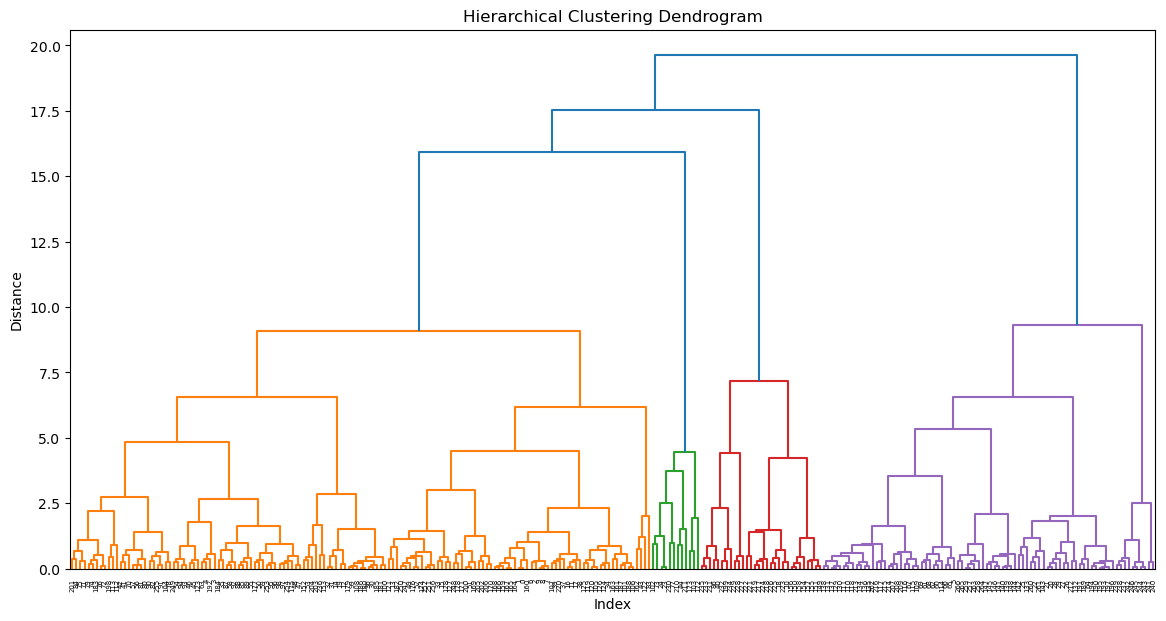

In [23]:
# Dendrogram
# Perform hierarchical clustering
linked = linkage(df2_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(14, 7))
dendrogram(linked, orientation='top', labels=df2.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


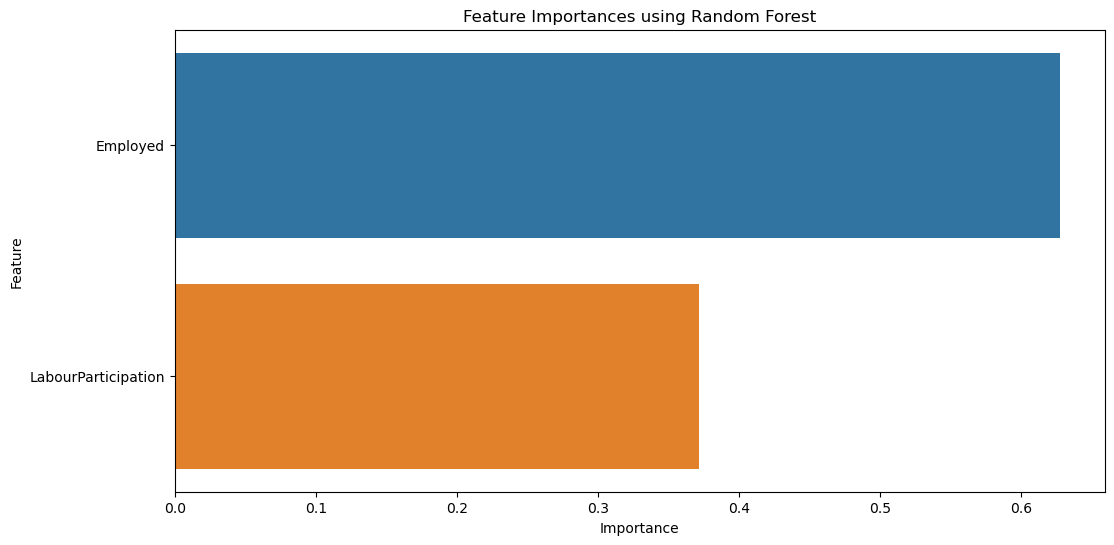

In [25]:
# Feature Importance using Random Forest
# Prepare the data
X_rf = df2[['Employed', 'LabourParticipation']]
y_rf = df2['UnemploymentRate']

# Initialize and fit the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_rf, y_rf)

# Get feature importances
importances = rf.feature_importances_
features = X_rf.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances using Random Forest')
plt.show()


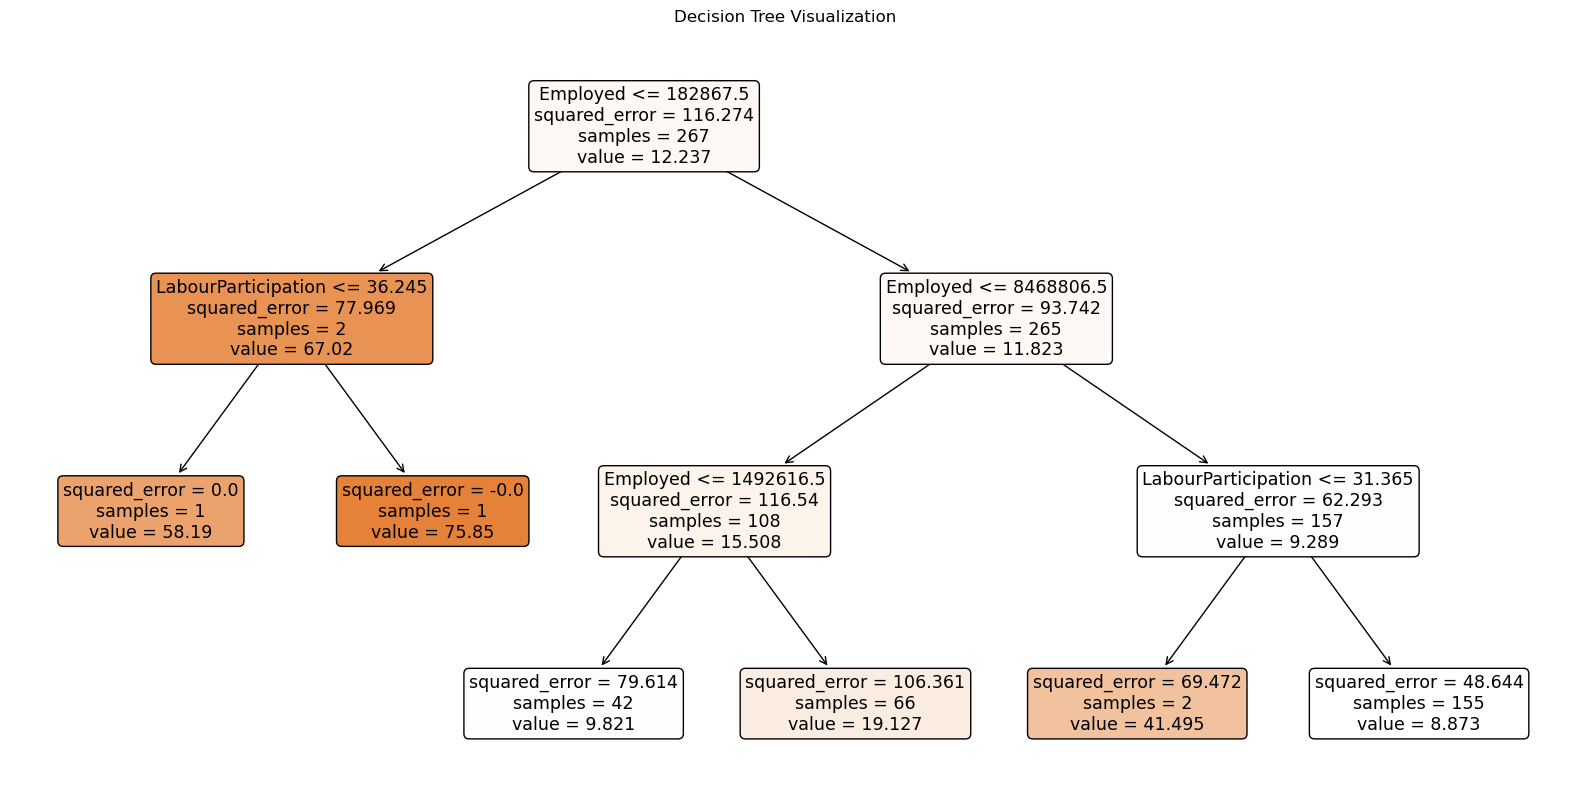

In [26]:
# Decision Tree Visualization
# Initialize and fit the model
dt = DecisionTreeRegressor(max_depth=3, random_state=42)
dt.fit(X_rf, y_rf)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X_rf.columns, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()